<a href="https://colab.research.google.com/github/susanth04/Machine-learning-lab/blob/main/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import requests

file_id = '1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2'
destination = 'groceries.csv'
url = f'https://drive.google.com/uc?id={file_id}'

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download&id={}"

    session = requests.Session()

    response = session.get(URL.format(id), stream=True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL.format(id),
                                params = params,
                                stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

download_file_from_google_drive(file_id, destination)

In [ ]:
import pandas as pd

df = pd.read_csv('groceries.csv')
display(df.head())
display(df.info())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

In [ ]:
display(df.isnull().sum())

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

numerical_features = X.select_dtypes(include=np.number).columns

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Check if there are any categorical features that need encoding (assuming none for now based on df.info())
# If there were, we would use techniques like OneHotEncoder.

display(X.head())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


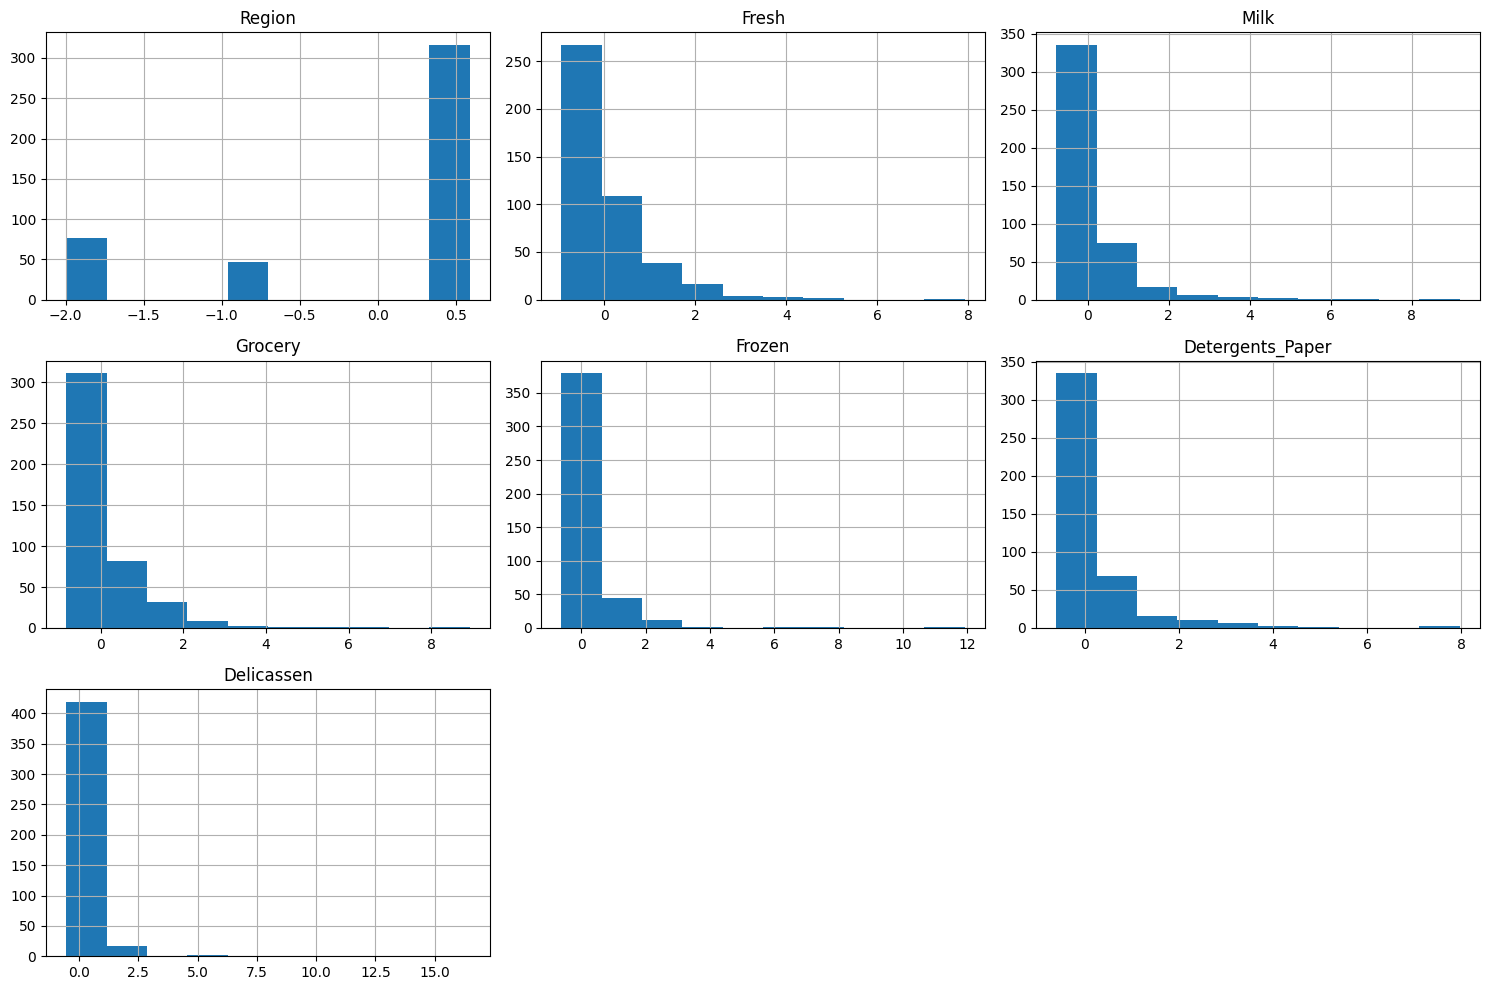

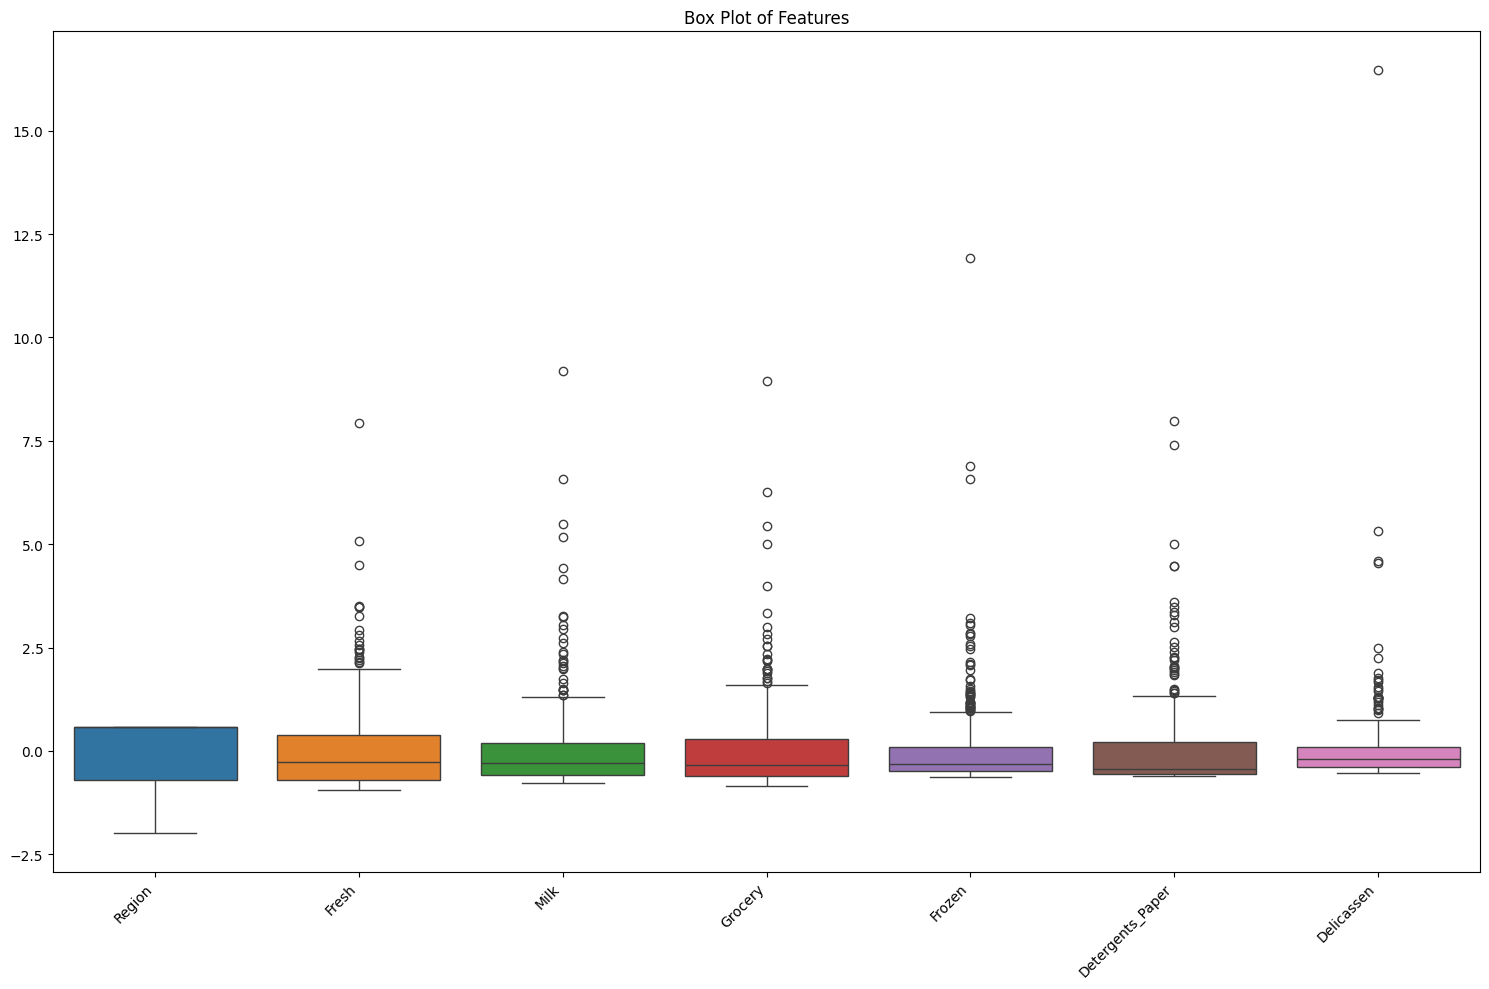

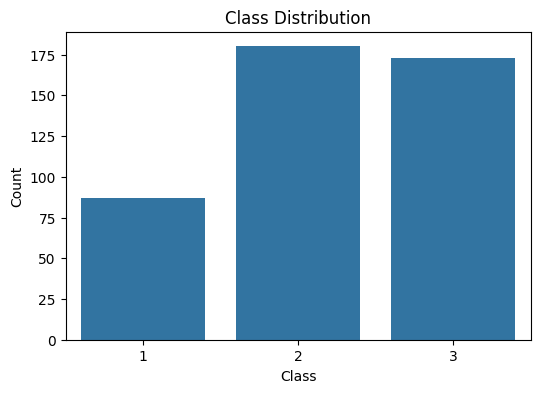

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of features using histograms
X.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualize potential outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Box Plot of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check for class distribution imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Shape of X before SMOTE: {X.shape}")
print(f"Shape of X after SMOTE: {X_resampled.shape}")

print(f"Class distribution before SMOTE: {y.value_counts()}")
print(f"Class distribution after SMOTE: {y_resampled.value_counts()}")

Shape of X before SMOTE: (440, 7)
Shape of X after SMOTE: (540, 7)
Class distribution before SMOTE: class
2    180
3    173
1     87
Name: count, dtype: int64
Class distribution after SMOTE: class
2    180
1    180
3    180
Name: count, dtype: int64


In [ ]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2)**2))

def knn_predict(train_data, train_labels, test_point, k):
    """Predicts the class of a test point using the KNN algorithm."""
    distances = [euclidean_distance(test_point, train_data[i]) for i in range(len(train_data))]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [train_labels[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Prepare data for KNN
X = df.drop('class', axis=1).values
y = df['class'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set using scratch KNN
k = 5 # You can adjust the value of k
y_pred = [knn_predict(X_train, y_train, test_point, k) for test_point in X_test]

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of scratch KNN: {accuracy}")

Accuracy of scratch KNN: 0.9318181818181818


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create an instance of KNeighborsClassifier with the same k
knn_sklearn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn_sklearn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_sklearn = knn_sklearn.predict(X_test)

# Calculate the accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Print the accuracy of scikit-learn KNN
print(f"Accuracy of scikit-learn KNN: {accuracy_sklearn}")

# Compare the accuracies
print(f"Accuracy of scratch KNN: {accuracy}")
print(f"Comparison: Scikit-learn KNN accuracy is {accuracy_sklearn - accuracy:.4f} different from scratch KNN accuracy.")

Accuracy of scikit-learn KNN: 0.9204545454545454
Accuracy of scratch KNN: 0.9318181818181818
Comparison: Scikit-learn KNN accuracy is -0.0114 different from scratch KNN accuracy.
